# Домашнее задание по теме "Работа с переменными"

Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston


In [35]:
boston = load_boston()


In [36]:
print(boston['DESCR'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
df = pd.read_csv(boston['filename'], skiprows=1)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [38]:
# how many features in dataframe
df.shape

(506, 14)

In [39]:
# check standart statistic of dataset 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [40]:
# 'ZN' and 'CHAS' are categorical variables. Let's make assumption that these colums not so useful for 'MEDV' prediction.


In [41]:
# check for the missing data
df.isnull().sum()
# no missing data, so we can move further

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Exploratory Analysis:


D:\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


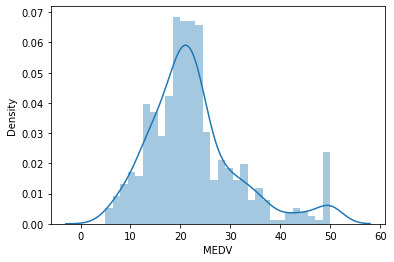

In [42]:
# check distribution of the target variable
# distribution of the 'MEDV' is nearly normal, but there are some outliers
sns.distplot(df['MEDV'], bins=30)
plt.show()


In [43]:
X = df.loc[:, df.columns != 'MEDV']
y = df[['MEDV']]

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
linReg = LinearRegression()

# train model
linReg.fit(X_train, y_train)

# make predictions for test data
predictions = linReg.predict(X_test)

# check accuracy of the predictions
linReg.score(X_test, y_test)
# 71 % - let's try to improve the result


0.7112260057484903

D:\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

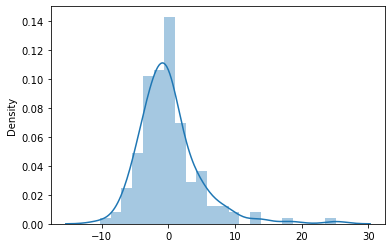

In [44]:
# visualize error distribution
error = y_test - predictions
sns.distplot(error)


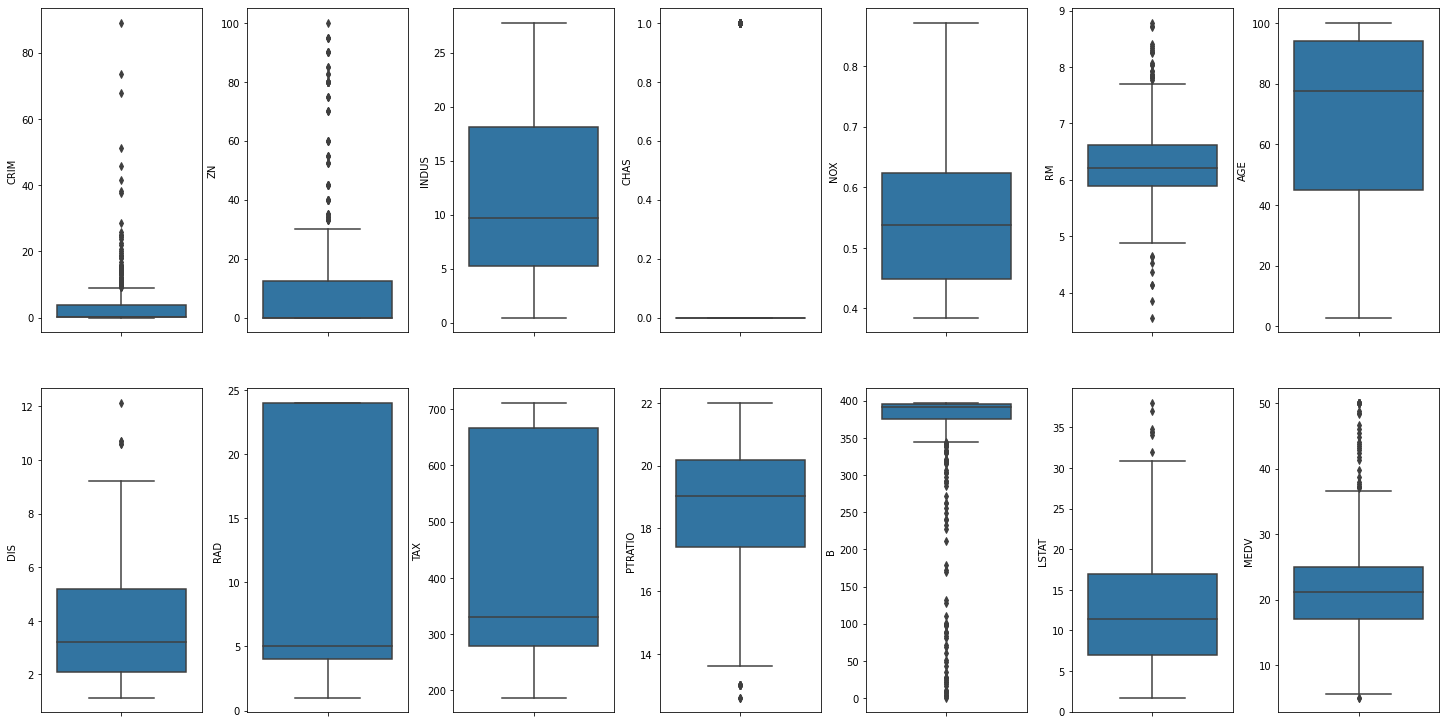

In [45]:
# let's build boxplots to see outliers
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


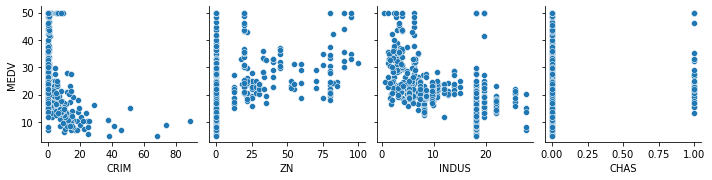

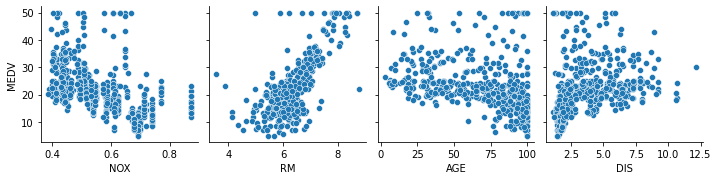

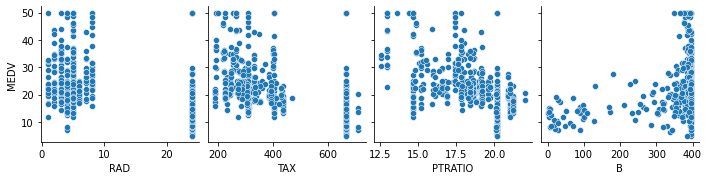

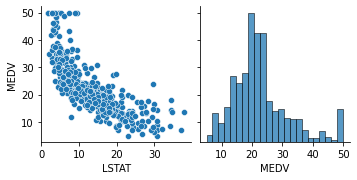

In [46]:
# check for outliers on pairplot
for i in range(0, len(df.columns), 4):
    sns.pairplot(data=df,
             x_vars=df.columns[i:i+4],
             y_vars=['MEDV'])


In [47]:
# let's see the outliers percentage in each column
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))


Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [48]:
# let's try to remove MEDV outliers, assumption it is where value >= 50.0
df = df[~(df['MEDV'] >= 50.0)]
df.shape

(490, 14)

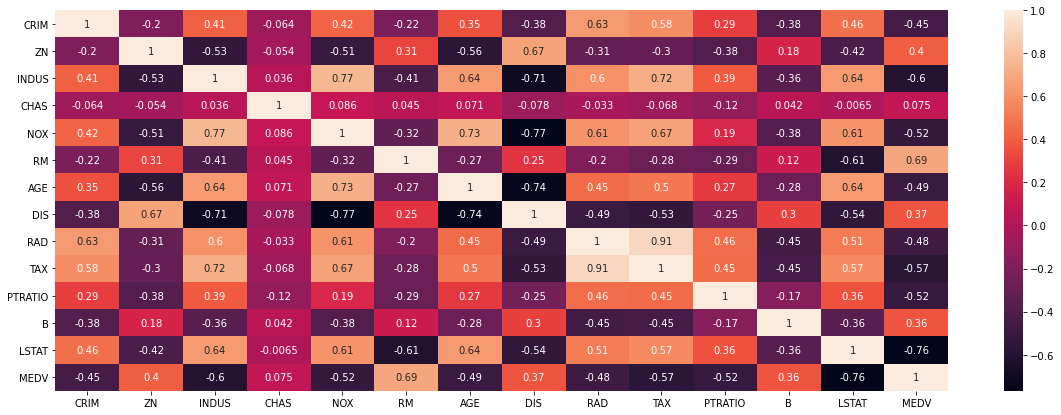

In [49]:
# check relationships between dependent and independent variables using by correlation matrix (heatmap)
# correlation coefficients range from -1 to 1.
# -1 means there is a strong negative correlation
# 1 means there is a strong positive correlation.
# If the correlation coefficient is zero, there is no correlation.

plt.figure(figsize=(20, 7))
sns.heatmap(data=df.corr(), annot=True)
plt.show()


In [54]:
# as we see we can try to predict 'MEDV' with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features.
selected_cols = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = df[selected_cols]
y = df[['MEDV']]

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
linReg = LinearRegression()

# train model
linReg.fit(X_train, y_train)

# make predictions for test data
predictions = linReg.predict(X_test)

# check accuracy of the predictions
linReg.score(X_test, y_test)
# 72.7% - looks better than previous (71%)


0.7268554888697853

In [55]:
# let's try to scale data
min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=selected_cols)
X_scaled.head()


,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015,0.268711,0.641607
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962,0.348524,0.782698
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962,0.348524,0.599382
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794,0.448173,0.441813
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794,0.448173,0.528321


In [57]:
# let's try to remove the skewness of the data using by log transformation

y = np.log1p(y)
for col in X_scaled.columns:
    if np.abs(X_scaled[col].skew()) > 0.3:
        X_scaled[col] = np.log1p(X_scaled[col])


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
linReg = LinearRegression()

# train model
linReg.fit(X_train, y_train)

# make predictions for test data
predictions = linReg.predict(X_test)

# check accuracy of the predictions
linReg.score(X_test, y_test)
# 74.8% - looks better than previous (72.7%)


0.7479811046367821